# Mid-Course Project

Hi There, and thanks for your help. If you're reading this you've been selected to help on a secret initiative.

You will be helping us analyze a portion of data from a company we want to acquire, which could greatly improve the fortunes of Maven Mega Mart.

We'll be working with `project_transactions.csv` and briefly take a look at `product.csv`.

First, read in the transactions data and explore it.

* Take a look at the raw data, the datatypes, and cast `DAY`, `QUANTITY`, `STORE_ID`, and `WEEK_NO` columns to the smallest appropriate datatype. Check the memory reduction by doing so.
* Is there any missing data?
* How many unique households and products are there in the data? The fields household_key and Product_ID will help here.

In [79]:
import pandas as pd
import numpy as np

In [80]:
transactions = pd.read_csv("../project_data/project_transactions.csv")

In [81]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [82]:
transactions.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   WEEK_NO            int64  
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(7)
memory usage: 180.1 MB


In [83]:
transactions.describe().loc["min":"max"]

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
min,1.0,2.698490e+10,1.0,25671.0,0.0,0.00,1.0,-130.02,1.0,-55.93,-7.7
25%,548.0,3.040798e+10,229.0,917231.0,1.0,1.29,330.0,-0.68,33.0,0.00,0.0
50%,1042.0,3.281176e+10,392.0,1027960.0,1.0,2.00,372.0,0.00,57.0,0.00,0.0
75%,1581.0,4.012804e+10,555.0,1132771.0,1.0,3.49,422.0,0.00,80.0,0.00,0.0
max,2099.0,4.230536e+10,711.0,18316298.0,89638.0,840.00,34280.0,3.99,102.0,0.00,0.0


In [84]:
transactions = transactions.astype({"DAY":"Int16", "QUANTITY":"Int32","STORE_ID":"Int32","WEEK_NO":"Int8",})

transactions.info(memory_usage="deep")

#the memory usage has been reduced to 145.3 MB from 180.1 MB by downcasting the data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2146311 entries, 0 to 2146310
Data columns (total 11 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                Int16  
 3   PRODUCT_ID         int64  
 4   QUANTITY           Int32  
 5   SALES_VALUE        float64
 6   STORE_ID           Int32  
 7   RETAIL_DISC        float64
 8   WEEK_NO            Int8   
 9   COUPON_DISC        float64
 10  COUPON_MATCH_DISC  float64
dtypes: Int16(1), Int32(2), Int8(1), float64(4), int64(3)
memory usage: 145.3 MB


In [85]:
#Check the missing values

transactions.isna().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [86]:
# unique households and products

transactions["household_key"].nunique()

transactions["household_key"].nunique()

2099

In [87]:
transactions["PRODUCT_ID"].nunique()

84138

In [88]:
products = pd.read_csv("../project_data/product.csv")

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [89]:
# unique products in products table

products["PRODUCT_ID"].nunique()

92353

## Column Creation

Create two columns:

* A column that captures the `total_discount` by row (sum of `RETAIL_DISC`, `COUPON_DISC`)
* The percentage disount (`total_discount` / `SALES_VALUE`). Make sure this is positive (try `.abs()`).
* If the percentage discount is greater than 1, set it equal to 1. If it is less than 0, set it to 0. 
* Drop the individual discount columns (`RETAIL_DISC`, `COUPON_DISC`, `COUPON_MATCH_DISC`).

Feel free to overwrite the existing transaction DataFrame after making the modifications above.

In [90]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC
0,1364,26984896261,1,842930,1,2.19,31742,0.00,1,0.0,0.0
1,1364,26984896261,1,897044,1,2.99,31742,-0.40,1,0.0,0.0
2,1364,26984896261,1,920955,1,3.09,31742,0.00,1,0.0,0.0
3,1364,26984896261,1,937406,1,2.50,31742,-0.99,1,0.0,0.0
4,1364,26984896261,1,981760,1,0.60,31742,-0.79,1,0.0,0.0


In [91]:
#Create a discount sum column and a percentage discount column

transactions = (transactions.assign(total_discount = transactions["RETAIL_DISC"]+ transactions["COUPON_DISC"],
                                   percentage_discount = (lambda x: (x["total_discount"]/x["SALES_VALUE"]).abs()))
                .drop(["RETAIL_DISC", "COUPON_DISC", "COUPON_MATCH_DISC"], axis=1))

transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.316667
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0.108889


In [92]:
transactions["percentage_discount"] = (transactions["percentage_discount"]
                                     .where(transactions["percentage_discount"]<1,1.0)
                                     .where(transactions["percentage_discount"]>0,0))

transactions

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000
...,...,...,...,...,...,...,...,...,...,...
2146306,1598,42305362535,711,92130,1,0.99,3228,102,0.00,0.000000
2146307,1598,42305362535,711,114102,1,8.89,3228,102,0.00,0.000000
2146308,1598,42305362535,711,133449,1,6.99,3228,102,0.00,0.000000
2146309,1598,42305362535,711,6923644,1,4.50,3228,102,-0.49,0.108889


## Overall Statistics

Calculate:

* The total sales (sum of `SALES_VALUE`), 
* Total discount (sum of `total_discount`)
* Overall percentage discount (sum of total_discount / sum of sales value)
* Total quantity sold (sum of `QUANTITY`).
* Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?
* Total sales value per basket (sum of sales value / nunique basket_id).
* Total sales value per household (sum of sales value / nunique household_key). 

In [93]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


In [94]:
#Ttotal Sales

sum_of_sales_value = transactions["SALES_VALUE"].sum().round()

sum_of_sales_value

6666243.0

In [95]:
#Total Discount

sum_of_total_discount = transactions["total_discount"].sum()

sum_of_total_discount

-1178658.0799999998

In [96]:
#Overall Percentage Discount

overall_percentage_discount = sum_of_total_discount/sum_of_sales_value

overall_percentage_discount

-0.17680994827221266

In [97]:
#Total quantity sold (sum of QUANTITY)

sum_of_quantity = transactions["QUANTITY"].sum()

sum_of_quantity

216713611

In [98]:
transactions.max()

household_key          2.099000e+03
BASKET_ID              4.230536e+10
DAY                    7.110000e+02
PRODUCT_ID             1.831630e+07
QUANTITY               8.963800e+04
SALES_VALUE            8.400000e+02
STORE_ID               3.428000e+04
WEEK_NO                1.020000e+02
total_discount         3.990000e+00
percentage_discount    1.000000e+00
dtype: float64

In [99]:
#Max quantity sold in a single row. Inspect the row as well. Does this have a high discount percentage?

transactions["QUANTITY"].max()

89638

In [100]:
#Grab row with maximum value - discount rate in lower than average

transactions.loc[transactions["QUANTITY"].argmax()]

household_key                  630.0
BASKET_ID              34749153595.0
DAY                            503.0
PRODUCT_ID                 6534178.0
QUANTITY                     89638.0
SALES_VALUE                    250.0
STORE_ID                       384.0
WEEK_NO                         73.0
total_discount                -13.45
percentage_discount           0.0538
Name: 1442095, dtype: Float64

In [101]:
#Total sales value per basket (sum of sales value / nunique basket_id).

sum_of_sales_value/transactions["BASKET_ID"].nunique()



28.61797723867622

In [102]:
#Total sales value per household (sum of sales value / nunique household_key).

sum_of_sales_value/transactions["household_key"].nunique()

3175.913768461172

## Household Analysis

* Plot the distribution of total sales value purchased at the household level. 
* What were the top 10 households by quantity purchased?
* What were the top 10 households by sales value?
* Plot the total sales value for our top 10 households by value, ordered from highest to lowest.


In [103]:
transactions.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,WEEK_NO,total_discount,percentage_discount
0,1364,26984896261,1,842930,1,2.19,31742,1,0.00,0.000000
1,1364,26984896261,1,897044,1,2.99,31742,1,-0.40,0.133779
2,1364,26984896261,1,920955,1,3.09,31742,1,0.00,0.000000
3,1364,26984896261,1,937406,1,2.50,31742,1,-0.99,0.396000
4,1364,26984896261,1,981760,1,0.60,31742,1,-0.79,1.000000


<Axes: ylabel='Frequency'>

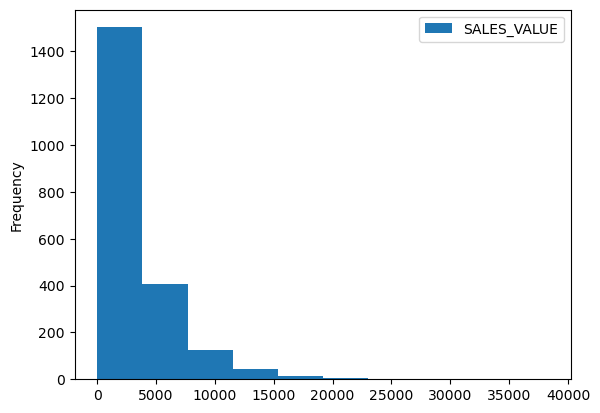

In [109]:
#Plot the distribution of total sales value purchased at the household level
(transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .plot.hist())

In [114]:
#top 10 households by sales value

top_10_sales = (transactions
 .groupby("household_key")
 .agg({'SALES_VALUE': 'sum'})
 .sort_values("SALES_VALUE", ascending=False)
 . iloc[:10])

In [113]:
#the top 10 households by quantity purchased

top_10_quantity =(transactions
 .groupby("household_key")
 .agg({'QUANTITY': 'sum'})
 .sort_values("QUANTITY", ascending=False)
 . iloc[:10])

In [115]:
top_10_sales

,SALES_VALUE
household_key,
1023,38319.79
1609,27859.68
1453,21661.29
1430,20352.99
718,19299.86
707,19194.42
1653,19153.75
1111,18894.72
982,18790.34


In [117]:
top_10_quantity

,QUANTITY
household_key,
1023,4479917
755,3141769
1609,2146715
13,1863829
1430,1741892
1527,1734632
1762,1669880
707,1640193
1029,1496204


In [124]:
transactions.groupby("household_key").agg({"SALES_VALUE":"sum","QUANTITY":"sum"}).sort_values("SALES_VALUE", ascending=False).loc[:, "SALES_VALUE"].describe()

count     2099.000000
mean      3175.914007
std       3287.043772
min          8.170000
25%        971.035000
50%       2145.710000
75%       4295.395000
max      38319.790000
Name: SALES_VALUE, dtype: float64

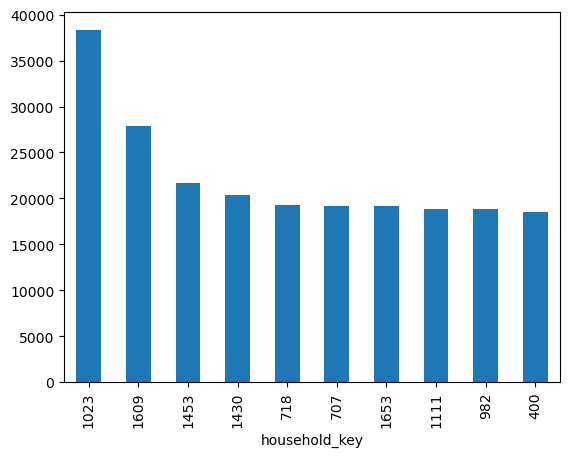

In [123]:
top_10_sales["SALES_VALUE"].plot.bar();

## Product Analysis

* Which products had the most sales by sales_value? Plot  a horizontal bar chart.
* Did the top 10 selling items have a higher than average discount rate?
* What was the most common `PRODUCT_ID` among rows with the households in our top 10 households by sales value?
* Look up the names of the  top 10 products by sales in the `products.csv` dataset.
* Look up the product name of the item that had the highest quantity sold in a single row.

In [127]:
top_10_products =(transactions
                  .groupby(["PRODUCT_ID"])
                  .agg({"SALES_VALUE":"sum"})
                  .sort_values("SALES_VALUE",ascending=False)
                  .iloc[:10])

<Axes: ylabel='PRODUCT_ID'>

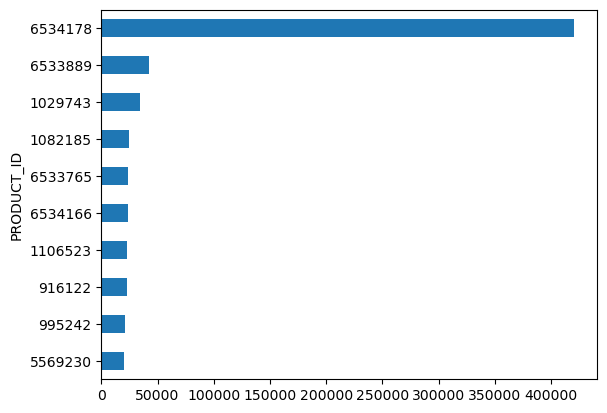

In [128]:
top_10_products["SALES_VALUE"].sort_values().plot.barh()

In [131]:
((transactions.query("PRODUCT_ID in @top_10_products.index").loc[:,"total_discount"].sum()))/(transactions.query("PRODUCT_ID in @top_10_products.index").loc[:,"SALES_VALUE"].sum())

-0.10331267387397927

In [133]:
products = pd.read_csv("../project_data/product.csv")

products.head()

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ


In [136]:
transactions.query("household_key in @top_10_sales.index").loc[:"PRODUCT_ID"].value_counts().iloc[:10].index

MultiIndex([( 400, 28294825562, 109, 881964, 1, 1.25,   304, 16, -0.74, ...),
            (1430, 41834530787, 677, 964186, 1, 3.29, 31742, 97,   0.0, ...),
            (1430, 41834530787, 677, 844740, 4,  5.0, 31742, 97, -2.56, ...),
            (1430, 41834530787, 677, 845894, 1,  3.0, 31742, 97, -0.99, ...),
            (1430, 41834530787, 677, 856345, 1,  2.0, 31742, 97, -0.19, ...),
            (1430, 41834530787, 677, 882013, 1, 4.39, 31742, 97,  -0.3, ...),
            (1430, 41834530787, 677, 885863, 1, 3.83, 31742, 97, -0.64, ...),
            (1430, 41834530787, 677, 900311, 1, 2.09, 31742, 97,   0.0, ...),
            (1430, 41834530787, 677, 908213, 2,  1.0, 31742, 97,   0.0, ...),
            (1430, 41834530787, 677, 921504, 1, 6.29, 31742, 97, -1.57, ...)],
           names=['household_key', 'BASKET_ID', 'DAY', 'PRODUCT_ID', 'QUANTITY', 'SALES_VALUE', 'STORE_ID', 'WEEK_NO', 'total_discount', 'percentage_discount'])